## Soot Absorption Coefficient

* This work was supported by the National Science Foundation under grant number CBET-1403403. 
* Compare the soot absorption coefficient in Arches, to values in Modest's book (third edition, page 424-425). 
* Also, absorption coefficients reported in [Williams, Shaddix et al. Int. J. Heat and Mass Transfer 50:1616-1630 (2007)](https://www.sciencedirect.com/science/article/pii/S0017931006004893) are shown in comments and can be plotted as well.

### Arches

$$k_a = \frac{4}{L}\ln(1+350 f_v L T),$$

where $k_a$ is the absorption coefficient (1/m), $L$ is the optical path length (m), $f_v$ is the soot volume fraction, and $T$ is temperature (K). Note, $f_v=\rho Y_s/\rho_{soot}$. For a volume fraction of 1 ppmv, $f_v=1\times 10^{-6}$.

* Reference: "Radiative Transfer in Combustion Chambers: Influence of Alternative Fuels," Sixth Intl. Heat Transfer Conf., Toronto, Vol 6, pp 199-217, August, 1978.

* Note, $k_a$ is related to $\epsilon$ by

$$ \epsilon = 1-e^{-kL}.$$

### Modest

$$ k_a = 3.72 f_vC_0T/C_2,$$

$$ C_2 = 0.014388\mbox{ m*K},$$

$$ C_0 = \frac{36\pi n k}{(n^2 - k^2 + 2)^2 + 4n^2k^2}.$$

* We are given five experimental sets of $k$ and $n$ values. 
* Here, $k_a$ is the average of the Planck and Rossland mean absorption coefficients (which differ by 6%).

### Summary

* $k_a$ is a function of $T$ and $f_v$. 
* Plot $k_a$ versus $T$ at three values of $f_v$. 
* For each of the three plots, compare $k_a$ for Arches to the values from Modest.


In [1]:
# The following is from Brad Adams dissertation and has been used historically in ARCHES for soot radiation.

from IPython.display import HTML
HTML('<iframe src=https://ignite.byu.edu/public/arches_soot_model_Adams_dissertation.pdf width=700 height=350></iframe>')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n = np.array([2.21, 2.63, 2.19, 1.89, 2.31, 1.75])
k = np.array([1.23, 1.95, 1.30, 0.92, 0.71, 1.03])
#n = np.array([1.75, 1.57, 1.90, 1.99, 1.55])
#k = np.array([1.03, 0.56, 0.43, 0.89, 0.80])
C0 = 36*np.pi*n*k/((n**2-k**2+2)**2 + 4*n**2*k**2)
C2 = 0.014388                          # m*K
L  = 1                                 # m

T = np.linspace(1000,3000,100)         # K
fv = np.logspace(-2,1,100)*1E-6
names = ('Lee', 'Stull', 'Dalzell', 'Chang', 'Felske', 'Shaddix')
#names = ('Shaddix', 'D&S', 'L&T', 'Krishnan', 'M&M')
print(names)
print("sootFac = 3.72*C0/C2 =", 3.72*C0/C2)

('Lee', 'Stull', 'Dalzell', 'Chang', 'Felske', 'Shaddix')
sootFac = 3.72*C0/C2 = [ 1360.91739122  1141.59415144  1423.21929654  1476.9258092    834.99045236
  1816.93746944]


In [4]:
def plot_em(fv, ax, ylabel=True):

    ka_A = 4/L*np.log(1+350*fv*L*T)          # k_abs for Arches
    ka_M = np.empty((len(T),len(n)))         # k_abs for Modest
    for j in range(len(n)):
        ka_M[:,j] = 3.72*fv*C0[j]/C2*T                 
        
    #-------- plot em
    
    plt.rc('font',size=14)
    for j in range(len(n)):
        ax.plot(T,ka_M[:,j], label=names[j])
    ax.plot(T,ka_A, '--', label='Arches')
    ax.legend(frameon=False)
    ax.set_xlabel('T (K)')
    if ylabel: ax.set_ylabel(r'$k_{abs}$ (1/m)')
    ax.set_title('fv = ' + str(np.round(fv/1E-6,2)) + ' ppmv')
    ax.set_xlim([500,3100])
    
#-----------------------------------------------

def plot_em2(T, ax, ylabel=True):

    ka_A = 4/L*np.log(1+350*fv*L*T)          # k_abs for Arches
    ka_M = np.empty((len(fv),len(n)))        # k_abs for Modest
    for j in range(len(n)):
        ka_M[:,j] = 3.72*fv*C0[j]/C2*T                 
        
    #-------- plot em
    
    plt.rc('font',size=14)
    for j in range(len(n)):
        #ax.loglog(fv*1E6,ka_M[:,j], label=names[j])
        ax.semilogx(fv*1E6,ka_M[:,j], label=names[j])
    #ax.loglog(fv*1E6,ka_A, '--', label='Arches')
    ax.semilogx(fv*1E6,ka_A, '--', label='Arches')
    ax.legend(frameon=False)
    ax.set_xlabel('fv (ppmv)')
    if ylabel: ax.set_ylabel(r'$k_{abs}$ (1/m)')
    ax.set_title('T = ' + str(T) + ' K')

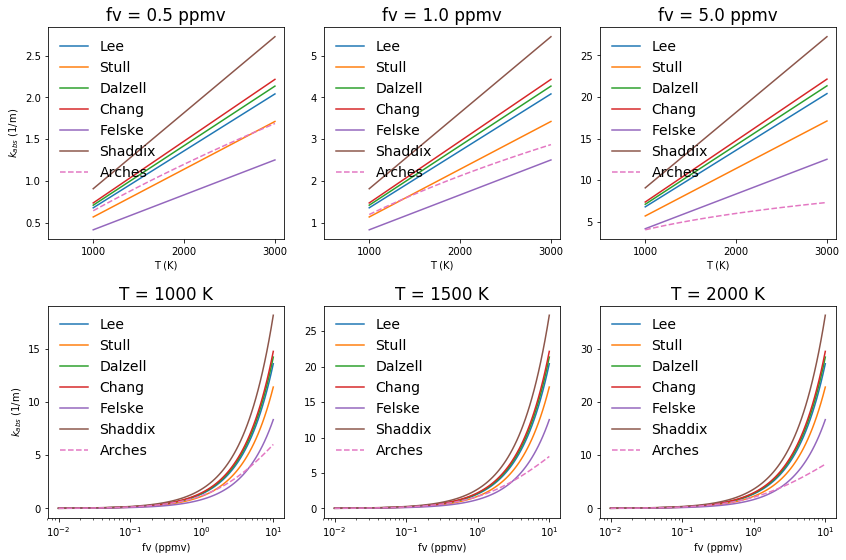

In [5]:

f, ax = plt.subplots(2, 3, figsize=(12,8))
plot_em(0.5E-6,  ax[0,0])
plot_em(1E-6,  ax[0,1], ylabel=False)
plot_em(5E-6, ax[0,2], ylabel=False)
plot_em2(1000, ax[1,0])
plot_em2(1500, ax[1,1], ylabel=False)
plot_em2(2000, ax[1,2], ylabel=False)
plt.tight_layout()

### Other comparisons

6.316233884474106


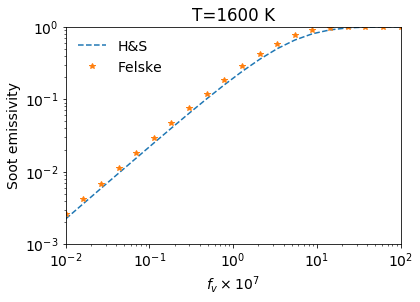

In [6]:
fv = np.logspace(-2,2,20)*1.0E-7
L = 1.0          # m
T = 1600.0       # K
C2 = 0.014388    # m*K
n = 2 #2.31
k = 2.2 #0.71
C0 = 36*np.pi*n*k/((n**2-k**2+2)**2 + 4*n**2*k**2)

eps_A = 1.0-(1.0+350*fv*T*L)**(-4)
eps_F = 1.0-np.exp(-L* (3.72*fv*C0*T/C2)   )

plt.loglog(fv*1E7,eps_A, '--',  label="H&S")
plt.loglog(fv*1E7,eps_F, '*', label="Felske")
plt.legend(frameon=False)
plt.title("T=1600 K")
plt.xlabel(r"$f_v\times 10^7$")
plt.ylabel("Soot emissivity")
plt.xlim([0.01,100])
plt.ylim([0.001,1])

print(C0)